**출처 : 파이썬 머신러닝 판다스 데이터 분석, 오승환 지음, 정보문화사**

### Matplotlib - 기본 그래프 도구

- [**선 그래프**](#선-그래프)
    - [**기본 사용법**](#기본-사용법)
    - [**차트 제목, 축 이름 추가**](#차트-제목,-축-이름-추가)
    - [**Matplotlib 한글 폰트 오류 해결**](#Matplotlib-한글-폰트-오류-해결)
    - [**그래프 꾸미기**](#그래프-꾸미기)
    - [**화면 분할하여 그래프 여러 개 그리기 - axes 객체 활용**](#화면-분할하여-그래프-여러-개-그리기---axes-객체-활용)    

- [**면적 그래프**](#면적-그래프)

- [**막대 그래프**](#막대-그래프)

- [**히스토그램**](#히스토그램)

- [**산점도**](#산점도)

- [**파이 차트**](#파이-차트)

- [**박스 플롯**](#박스-플롯)


* 판다스는 데이터 시각화를 지원하는 내장 기능이 있지만, 풍부한 편이 아님.
* Matplotlib 표준 시각화 도구는 2D 평면 그래프에 관한 다양한 포맷과 기능을 지원


# 선 그래프

* 선 그래프(line plot)
    - 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타냄.
    - 특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합

* 선 그래프 실습 파일 
    - Excel 파일 준비 : 통계청에서 제공하는 시도 간 인구 이동 데이터셋 
    - 출처 : KOSIS(통계청, 국내인구 이동통계), 2019. 1. 13

## 기본 사용법

In [1]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


* '전출지별' 열
    - 누락 데이터(NaN)가 다수 존재
        - 누락 데이터는 Excel 파일에서 병합된 셀을 데이터프레임으로 변환할 때 적절한 값을 찾지 못해서 발생
        - fillna() 메소드의 method='ffill' 옵션을 사용하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채움.
        - 예: 2행의 NaN 값을 1행의 데이터('전국')로 대체할 수 있음

In [2]:
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df.head(25)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,전국,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
7,전국,대전광역시,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
8,전국,울산광역시,-,-,-,-,-,-,-,-,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
9,전국,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,32784,23805,56526,83994,65052,82073


* '전출지별' 열 (계속)
    - '전출지별' 열에서 '서울특별시'라는 값을 갖는 데이터만 추출하여 변수 df_seoul에 저장
        - 서울에서 다른 지역으로 전출(이동)하는 데이터만 남음
    - '전출지별' 열의 이름을 '전입지'로 변경, 
    - '전입지'열을 df_seoul의 행 인덱스로 지정. 이제 전입지를 기준으로 데이터를 선택할 수 있음.

In [3]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
mask.head(25)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21     True
22     True
23     True
24     True
dtype: bool

In [4]:
df_seoul = df[mask]
df_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [5]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.head()

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


* '전출지별' 열 (계속)
    - '전출지별' 열의 이름을 '전입지'로 변경, 
    - '전입지'열을 df_seoul의 행 인덱스로 지정. 이제 전입지를 기준으로 데이터를 선택할 수 있음.

In [6]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [7]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

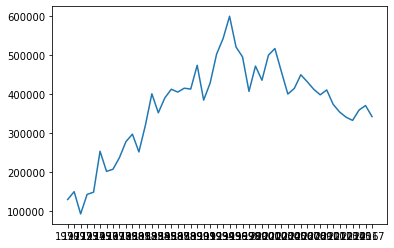

In [8]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

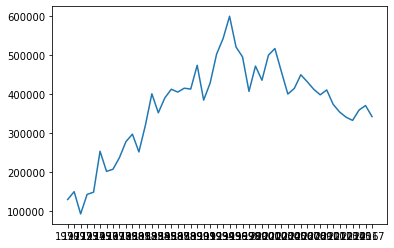

In [9]:
# 데이터프레임 전달해도 동일한 결과
plt.plot(sr_one)

## 차트 제목, 축 이름 추가

* 그래프에 차트 제목을 추가할 때는 title()함수
* x 축 이름은 xlabel() 함수, y 축 이름은 ylabel() 함수

C:\Users\nirkim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nirkim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nirkim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nirkim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nirkim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nirkim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing 

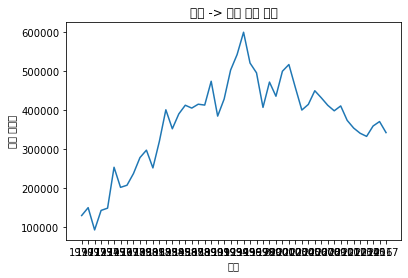

In [10]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

* 실행 결과에서 축 이름과 차트 제목이 제대로 표시되지 않음.
* x축 눈금 라벨의 글씨가 서로 겹침

## Matplotlib 한글 폰트 오류 해결

* 한글 폰트 오류를 해결하기 위해 Matplotlib를 사용하는 프로그램의 앞부분에 다음의 한글 폰트 지정 코드 추가

In [11]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"   #폰트파일의 위치 지정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

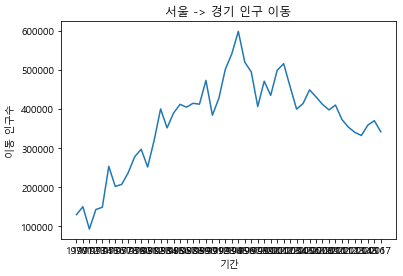

In [12]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력

* 맥OS 사용 시 한글 폰트 지정 방법

        from matplotlib import rc
        rc('font', family='AppleGothic')

## 그래프 꾸미기

* x축 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제 해결
    - 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생
    - 해결 방법
        - 공간을 만들기 위해 figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정
        - xticks() 함수를 활용하여 x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글자가 서로 겹치지 않게 설정

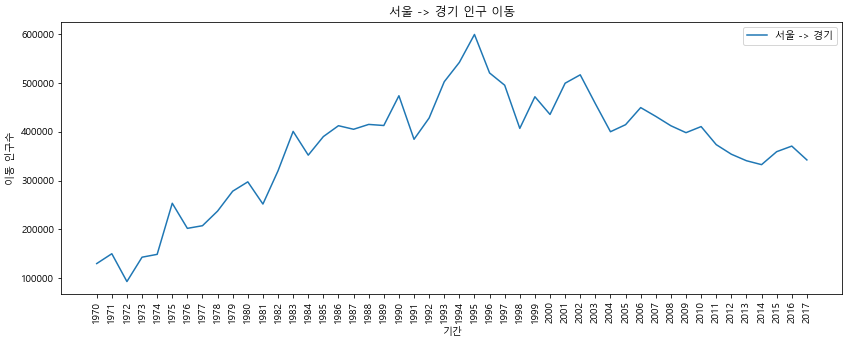

In [13]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
# plt.xticks(rotation=90) 
plt.xticks(rotation='vertical') 


# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

* Matplotlib의 스타일 서식 지정
    - 색, 폰트 등 디자인적 요소를 사전에 지정된 스타일로 일괄 변경. 
    - 다른 파일 실행할 때도 계속 적용됨.
    - 'ggplot'이라는 스타일 서식 지정

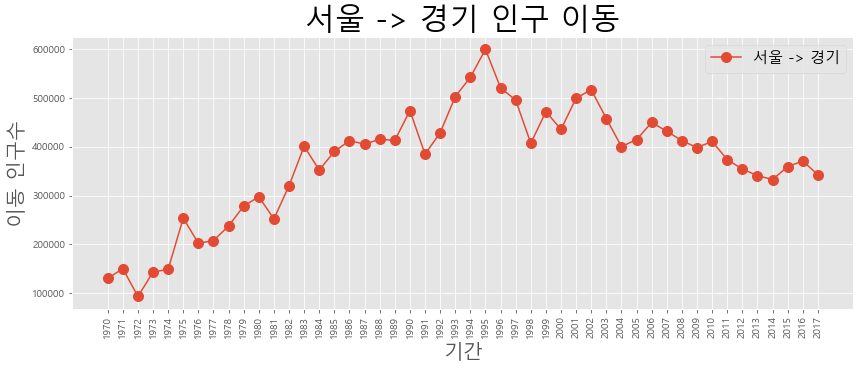

In [14]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

* Matplotlib 스타일 서식의 종류
    - 'ggplot'외에도 많은 종류의 스타일 서식 지원
    - 스타일의 종류: 'classic', 'bmh', 'dark_background', 'fast', 'grayscale', seaborn' 등 

* 사용 가능한 Matplotlib의 스타일 옵션 확인

In [15]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


* 스타일에 대한 상세한 정보 : 
https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

* 그래프의 주석 : annotate() 함수 사용
    - arrowprops 옵션 : 텍스트 대신 화살표 표시
        - 예: xy = (20, 620000)은 인덱스 번호 20을 x값으로 하고 620000명을 y값으로 한다는 뜻
    - rotation 옵션 : 양(+)의 회전 방향은 반시계방향.
    - 글자를 위아래 세로 방향으로 정렬하는 va 옵션
        - 'center', 'top', 'bottom', 'baseline'
    - 좌우 가로 방향으로 정렬하는 ha 옵션
        - 'center', 'left', 'right'
    - 상세한 옵션에 대한 정보 : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html

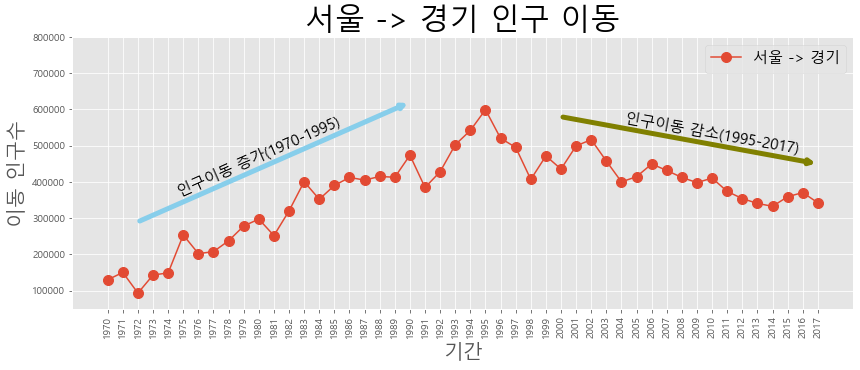

In [16]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"   #폰트파일의 위치 지정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 늘리기
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

#범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 360000),            #텍스트 위치 기준점
             rotation=24,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 480000),            #텍스트 위치 기준점
             rotation=-10,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력


* 1990년대 중반까지 경기도권 5대 신도시(분당, 일산 등) 개발로 서울 인구의 대규모 경기도 유입이 있었음을 추정
* 이 시기를 정점으로 서울을 벗어나 경기권으로 이동하는 인구는 현재까지 계속 감소하는 트렌드

## 화면 분할하여 그래프 여러 개 그리기 - axes 객체 활용

* 여러 개의 axes 객체를 만들고, 분할된 화면마다 axes 객체를 하나씩 배정
    - axes 객체는 각각 서로 다른 그래프를 표현할 수 있음.
    - 한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용
    - axes 객체를 1개만 생성하는 경우에는 하나의 그래프만 표시됨.
    
* figure() 함수를 사용해 그래프를 그리는 그림틀(fig)을 만든다.
    - figsize 옵션 : 그림틀의 크기(가로, 세로) 설정

* fig 객체에 add_subplot() 메소드를 적용하여 그림틀을 여러 개로 분할. 
    - 이때 나누어진 각 부분을 axes 객체라고 부름.   
    - add_subplot() 메소드의 인자에 "행의 크기, 열의 크기, 서브플롯 순서"를 순서대로 입력
        - 예: ax1 = fig.add_subplot(2, 1, 1) # (2,1,1) => (행의 개수, 열의 개수, 분할된 2부분중에서 1번째 부분)

* 각 axes 객체에 plot() 메소드를 적용하여 그래프를 출력
    * 선 그래프의 꾸미기 옵션
        - 'o' : 선 그래프가 아니라 점 그래프로 표현
        - marker='o' : 마커모양(예: 'o', +', '*', '.')
        - markerfacecolor='green' : 마커 배경색
        - markersize=10 : 마커 크기
        - color='olive' : 선의 색
        - linewidth=2 : 선의 두께
        - label='서울 -> 경기' : 라벨 지정    
    
* set_ylim() : y축의 최소값, 최대값 한계를 설정

* 연도를 나타내는 x축 눈금의 글씨가 서로 겹치치 않도록 set_xticklabels() 메소드 사용. 글자 반시계 방향으로 75도 회전.

<ipython-input-17-456f98be98d4>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-17-456f98be98d4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


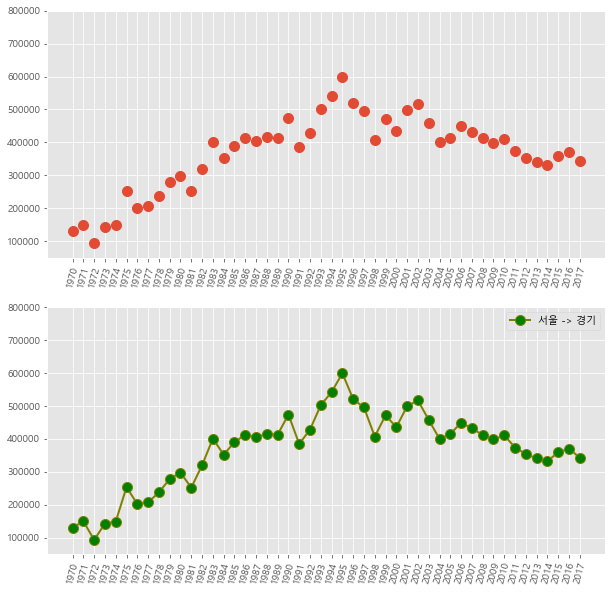

In [17]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))   
ax1 = fig.add_subplot(2, 1, 1) # (2,1,1) => (행의 개수, 열의 개수, 분할된 2부분중에서 1번째 부분)
ax2 = fig.add_subplot(2, 1, 2)

# axes 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10) # 'o' : 선을 그리지 않고 점으로만 표시
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, # marker='o' : 원 모양의 마커를 가진 선 그래프
         color='olive', linewidth=2, label='서울 -> 경기') 
ax2.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경사항 저장하고 그래프 출력

* axes 객체 그래프 꾸미기
    - 위의 두 번째 그래프에 제목과 축이름 추가  

<ipython-input-18-b2c3e575fc25>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


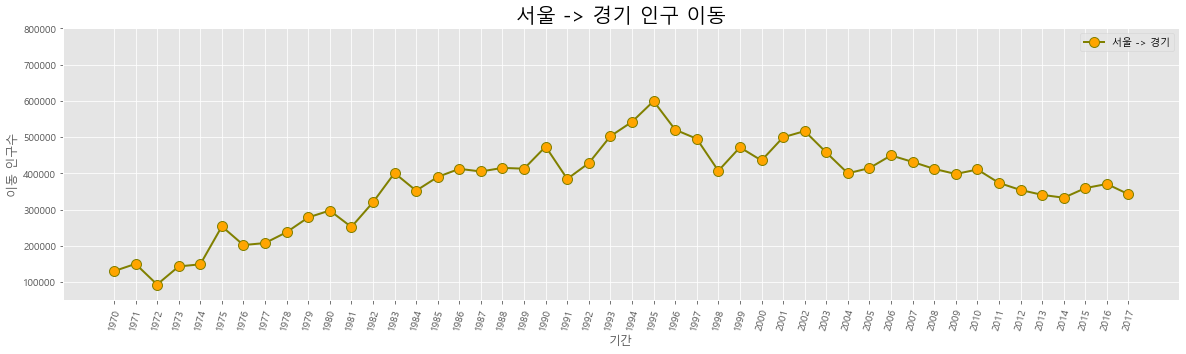

In [18]:
# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1) # (1,1,1) => (행의 개수, 열의 개수, 1번째 부분)

# axes 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, 
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10) # 축 눈금 라벨의 크기 조절
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

* 동일한 그림(axes 객체)에 여러 개의 그래프 추가하기
    - 그래프 3개를 하나의 같은 화면에 그리기
        - 동일한 axes 객체(ax)에 선 그래프로 출력하는 plot() 메소드를 3번 적용    

In [19]:
# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
col_years

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [20]:
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]
df_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


<ipython-input-21-63fa94cb4d91>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


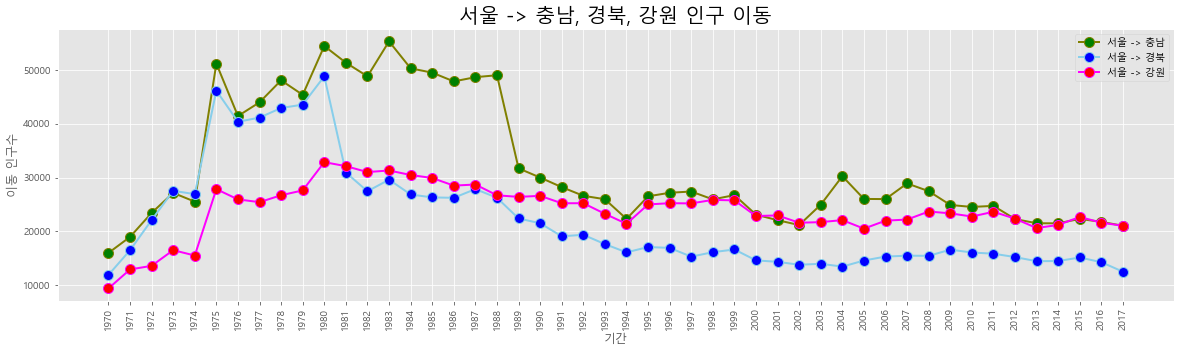

In [21]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axes 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

* 서울에서 서로 다른 3개 지역의 인구 이동을 비교가 쉬움.
    - 지리적으로 가까운 충남 지역으로 이동이 많음.
    - 1970~80년대에는 서울에서 지방으로 전출하는 인구가 많았으나, 1990년 이후로는 계속 감소하는 패턴

* 서울특별시에서 충청남도, 경상북도, 강원도, 전라남도 4개 지역으로 이동한 인구 변화 그래프를 그려보자
    - ax1~ax4까지 4개의 axes 객체를 생성
    - 각 지역에 해당하는 4개의 행을 선택하고, axes 객체에 하나씩 plot() 메소드를 적용
    - 범례와 차트 제목 등을 표시

<ipython-input-22-e02087dc2f4e>:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-22-e02087dc2f4e>:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-22-e02087dc2f4e>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-22-e02087dc2f4e>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


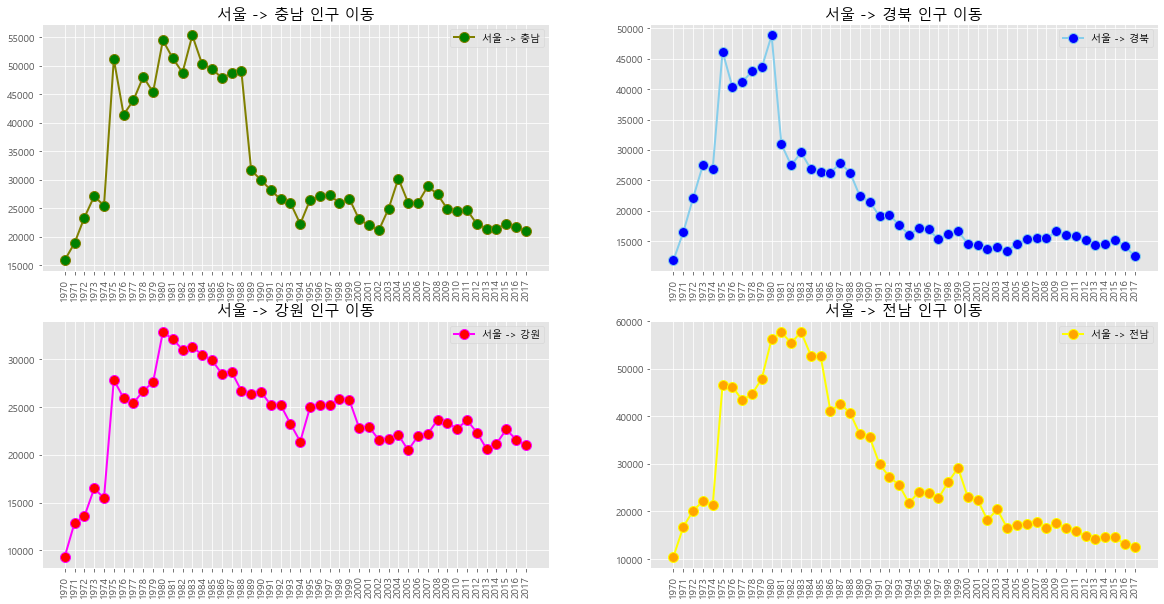

In [22]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"   #폰트파일의 위치 지정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))  
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axes 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', 
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()  # 변경사항 저장하고 그래프 출력

* Matplotlib 에서 사용할 수 있는 색상의 종류 확인하기

In [23]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib

# 컬러 정보를 담을 빈 딕셔너리 생성
colors={}

# 컬러 이름과 헥사코드 확인하여 딕셔서리에 입력
for name, hex in matplotlib.colors.cnames.items():
	colors[name] = hex

# 딕셔너리 출력    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

----

# 면적 그래프

* 면적 그래프(area plot)
    - 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀짐.
    - 색의 투명도(alpha)는 기본값 0.5로 투과되어 보인다(투명도 : 0~1 범위)
    - 선 그래프를 그리는 plot() 메소드에 kind='area' 옵션을 추가하면 간단하게 그릴 수 있음.
    - 그래프를 누적할지 여부도 설정 가능
        - 기본값은 stacked=True 옵션
            - 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현.
            - 각 열의 패턴과 함께 열 전체의 합계가 어떻게 변하는지 파악할 수 있음.
            - 면적 그래프를 선 그래프를 확장한 개념으로 누적 선 그래프(stacked line plot)라고 부르기도 함.
        - stacked=False
            - 각 열의 선 그래프들이 누적되지 않고 서로 겹치도록 표시됨. 
            - 그래프를 동일한 화면에 여러 개를 그린 것과 같은 결과.

* 면적 그래프 예 : stacked=False, unstacked 버전

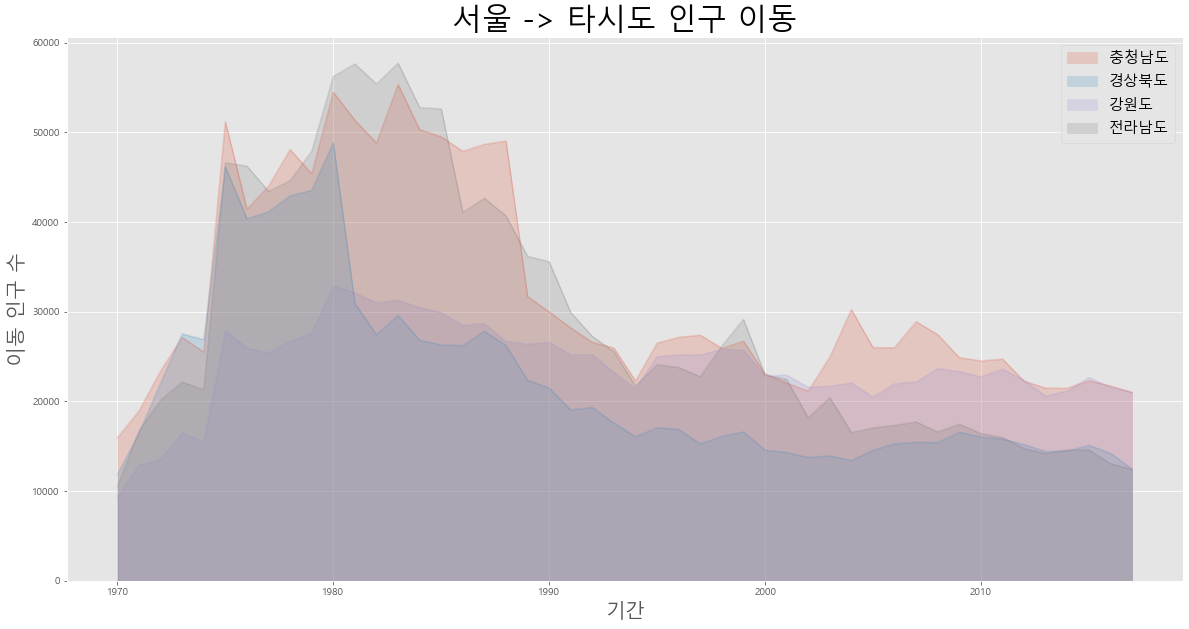

In [24]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"   #폰트파일의 위치 지정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

* 면적 그래프 예 : stacked=True, stacked 버전

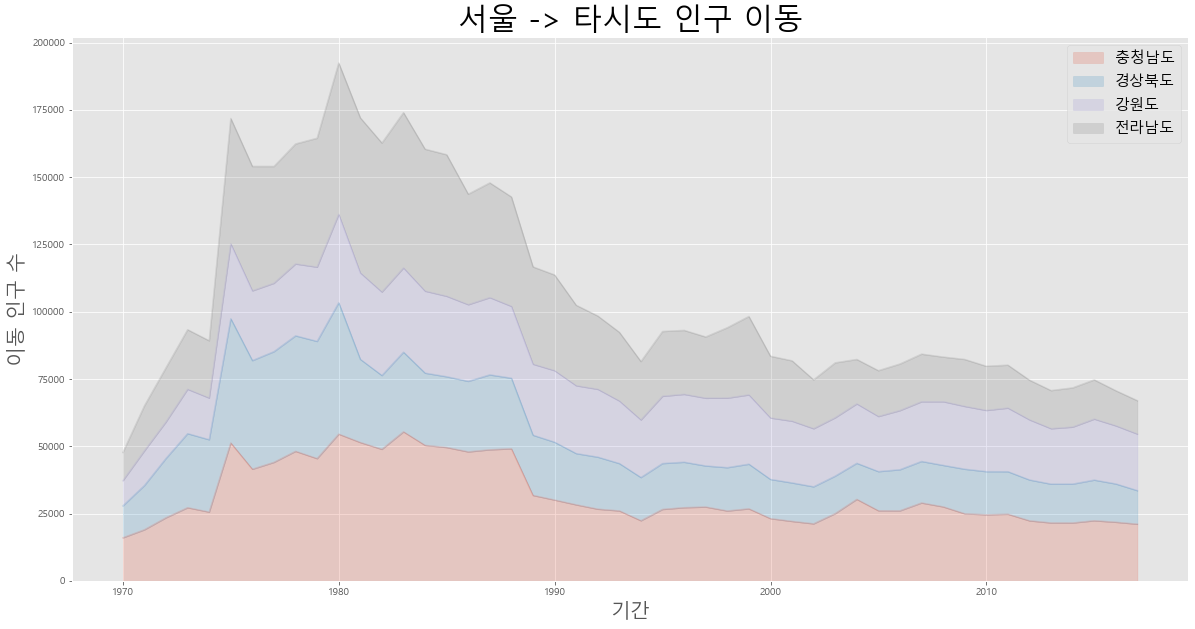

In [25]:
# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

* axes 객체 속성 변경하기
    - plot() 메소드로 생성한 그래프는 axes 객체
    - axes 객체(ax)의 세부적인 요소를 설정할 수 있음.
    - axes 객체의 속성을 이용하여 제목, 축 이름 등을 설정

<class 'matplotlib.axes._subplots.AxesSubplot'>


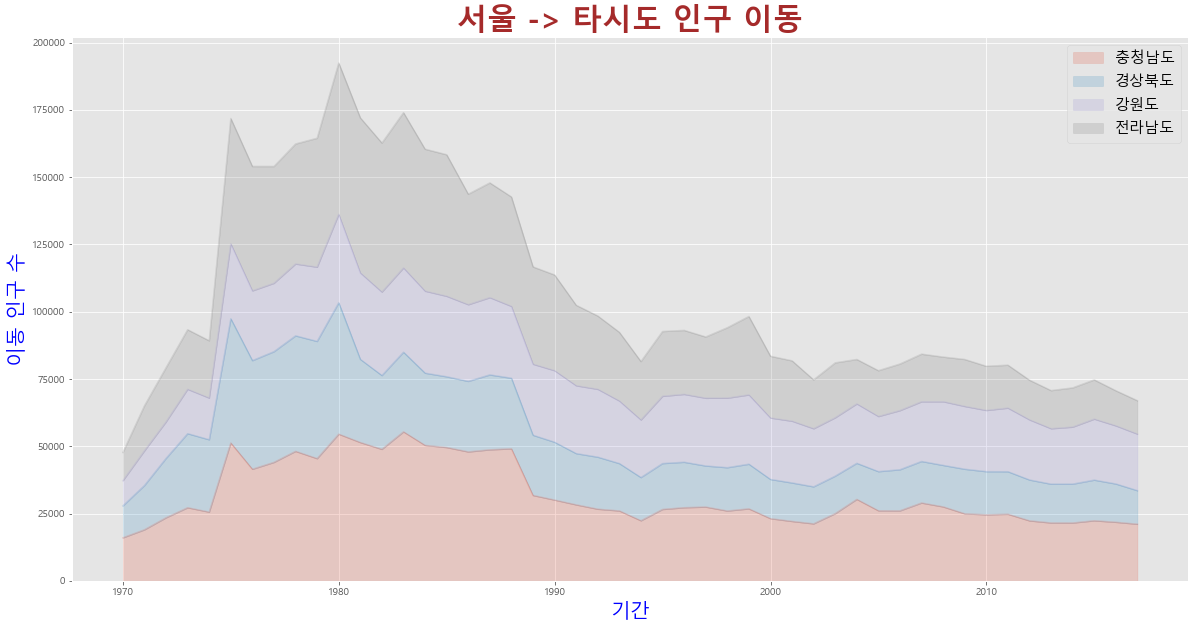

In [26]:
# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axes 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axes 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

----

# 막대 그래프

* 막대 그래프(bar plot)는 데이터 값의 크기에 비례하여 높이를 갖는 직사격형 막대로 표현
    - 막대 높이의 상대적 길이 차이를 통해 값의 크고 작음을 설명
    - 세로형과 가로형 막대 그래프 두 종류

* 세로형 막대 그래프
    - 세로형의 경우 정보 제공 측면에서 보면 선 그래프와 큰 차이가 없음.
    - 세로형 막대 그래프는 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명. 시계열 데이터 표현에 적합.
    - plot() 메소드의 kind='bar' 옵션

* 예제
    - 2010~2017년에 해당하는 데이터를 추출하기 위해, col_years 변수에 저장하는 값의 범위를 변경
    - plot() 메소드의 color 옵션을 추가하여 막대 색상을 다르게 설정

In [27]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
df_4

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


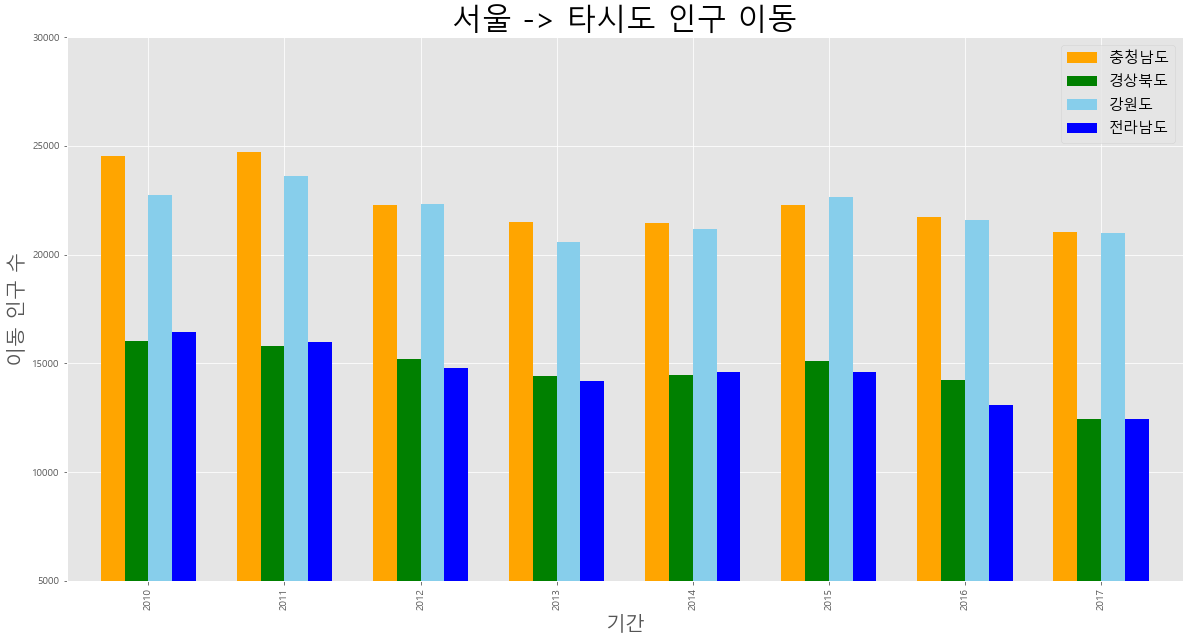

In [28]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

* 가로형 막대 그래프
    - 각 변수 사이 값의 크기 차이를 설명하는데 적합
    - plot() 메소드의 옵션으로 kin='barh'를 입력

* 예제
    - 2010~2017년의 기간 동안 서울에서 각 시도로 이동한 인구의 합계를 구하여 시도별로 비교하는 그래프

In [29]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [30]:
# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


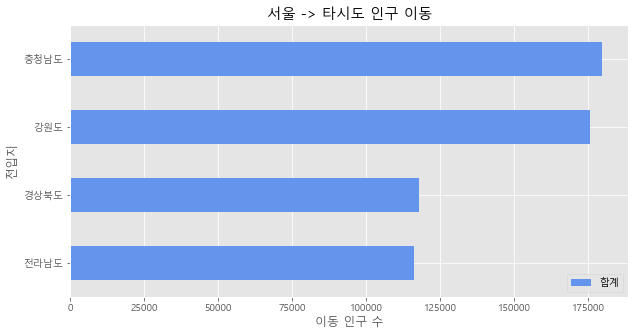

In [31]:
# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

* 2010~2017년에 이동 인구 합계를 기준으로 서울에서 충청남도로 이동한 사람이 제일 많음
    - 다음으로 강원도, 경상북도, 전라남도 순

* 보조 축 활용하기 (2축 그래프 그리기)
    - 보조 축을 추가하여 2개의 y축을 갖는 그래프
    - 예: 남북한 발전량 데이터셋 (출처 : KOSIS(통계청, 북한 통계: 발전 전력량), 2018.7.3)
        - 기존 축에는 막대 그래프의 값을 표시, 보조 축에는 선 그래프의 값을 표시
        - 막대 그래프는 연도별 북한의 발전량을 나타내고, 선 그래프는 북한 발전량의 전년 대비 증감률을 백분률로 나타냄.
        - 증감률을 계산하기 위해 rename() 메소드로 '합계' 열의 이름을 '총발전량'으로 바꾸고,
          shift() 메소드를 이용하여 '총발전량' 열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량-1년'열을 새로 생성
          두 열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 '증감률'열에 저장
        - ax1 객체는 막대 그래프에 stacked=True 옵션을 지정하여, '수력','화력' 열의 값을 아래 위로 쌓은 형태의 세로형 막대 그래프
        - ax1 객체에 twinx() 메소드를 적용하여 ax1 객체의 쌍둥이 객체를 만들고, 쌍둥이 객체를 ax2 변수에 저장
        - ax2 객체에 plot() 메소드를 적용하여 선 그래프를 그림. 그래프를 그릴때 사용할 데이터는 '증감률' 열에서 가져옴.
        - ls='--' 옵션은 선 스타일을 점선으로 설정         

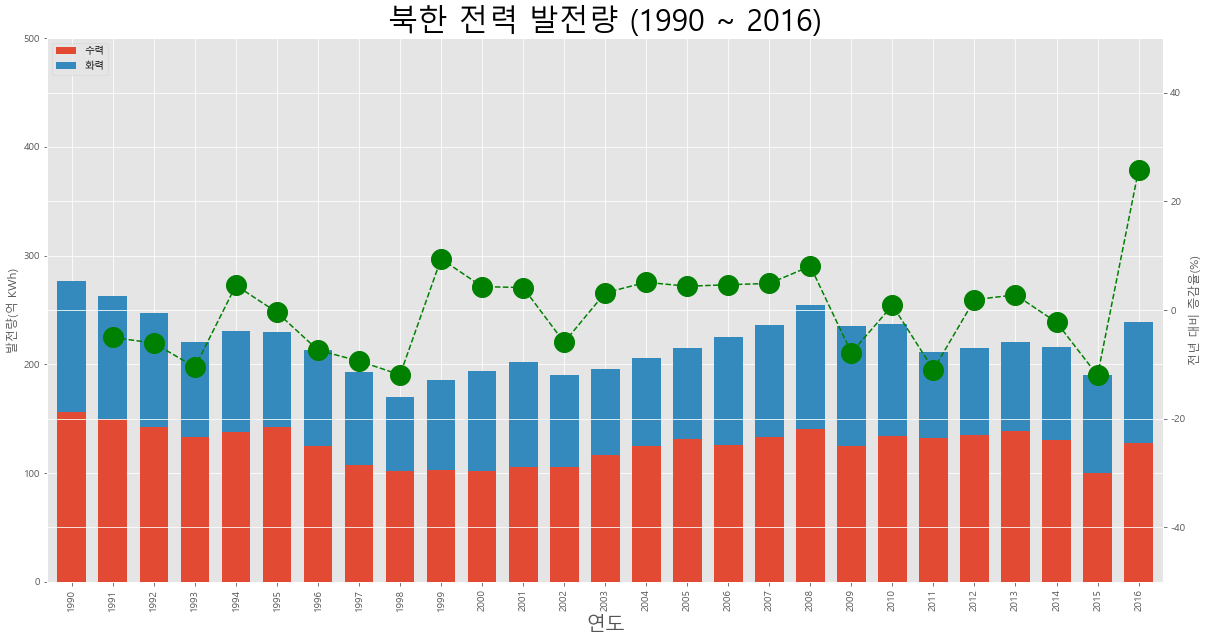

In [32]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"   #폰트파일의 위치 지정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')   # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100      

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

----

# 히스토그램

* 히스토그램(histogram)은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현
    - x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시
    - 구간을 나누는 간격의 크기에 따라 빈도가 달라지고 히스토그램의 모양이 변함

* 히스토그램 예제
    - UCI 자동차 데이터 셋 사용 : auto-mpg.csv
    - plot() 메소드에 kind='hist' 옵션을 지정, bins=10 옵션 지정하여 10개 구간으로 나눔
    - 자동차 연비 값은 대부분 좌측으로 편향되어 있어서 연비가 낮은 구간에 집중되어 있는 경향을 보임.

In [33]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


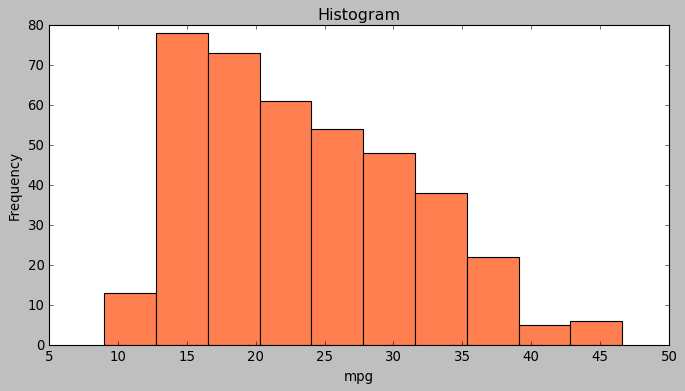

In [34]:
# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

----

# 산점도

* 산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 나타냄.
    - 각 변수는 연속되는 값을 가짐. 일반적으로 정수형 또는 실수형
    - 2개의 연속 변수를 각각 x축과 y축에 하나씩 놓고, 데이터 값이 위치하는 (x,y) 좌표를 찾아서 점으로 표시
    - plot() 메소드에 kind='scatter' 옵션 지정
        - x='weight' 옵션 : x축 위에 위치할 변수(데이터프레임의 열) 지정
        - y='mpg' 옵션 : y축 위에 위치할 변수 지정
        - 점의 색상(c)와 크기(s) 설정

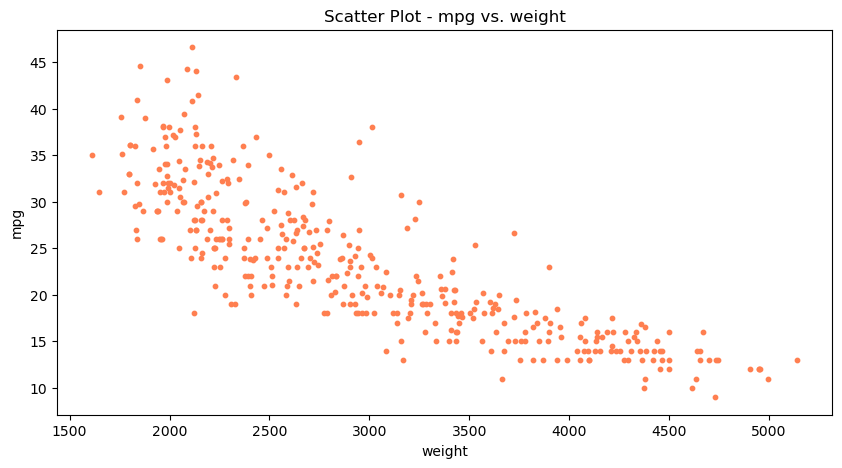

In [35]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

* 새로운 변수 추가하여 점의 크기 또는 색상으로 표현
    - 3번째 변수로 실린더 개수('cylinders'열) 추가
    - 해당 열의 최대값 대비 상대적 크기를 나타내는 비율을 계산하여 cylinders_size 변수에 저장
        - cylinders_size는 0~1 범위의 실수 값의 배열(시리즈)
    - 점의 크기를 정하는 s 옵션에 cylinders_size 지정하여 값의 크기에 따라 점의 크기를 다르게 표시.
        - 이러한 형태를 버블(bubble) 차트라고도 함.

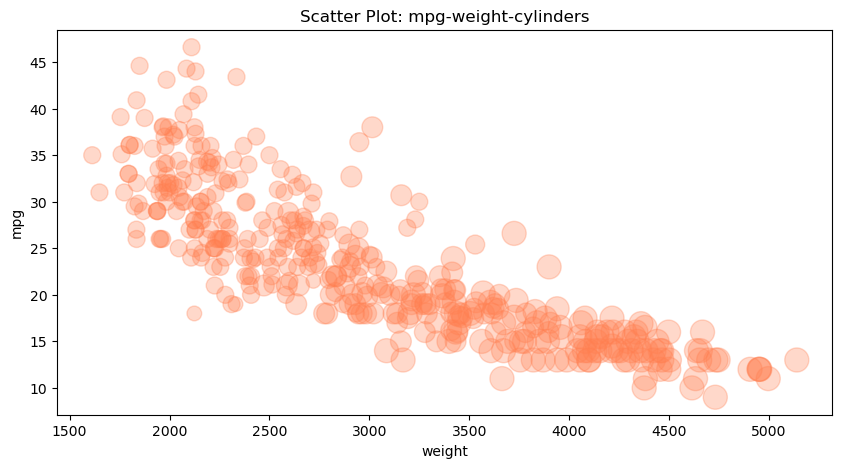

In [36]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

* Matplotlib로 생성한 그래프를 그림 파일로 저장하는 방법
    - savefig() 함수에 저장하려는 파일의 이름과 파일 경로 설정

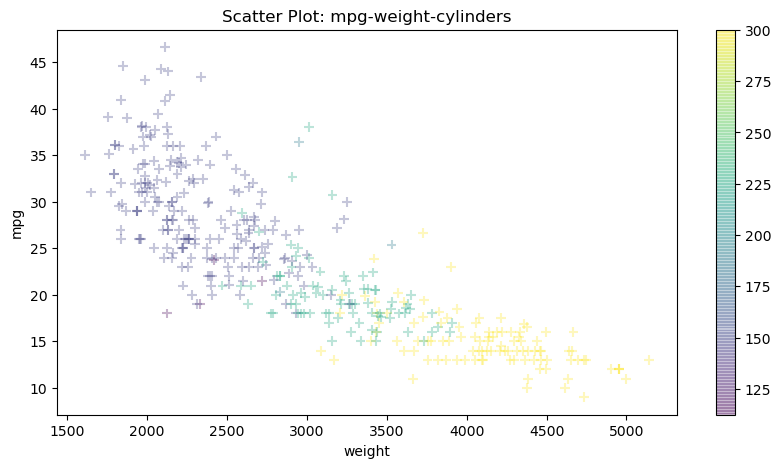

In [37]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

#df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
#        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)

# 3개의 변수로 산점도 그리기 
# 컬러맵(cmap)으로 'viridis' 옵션 지정
# 컬러맵 참조 사이트 : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

# 주피터 노트북 파일과 동일한 위치의 폴더에 2개의 그림 파일이 저장됨.
plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   # 배경색을 투명하게 지정

plt.show()

----

# 파이 차트

* 파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현
    - 조각 크기기는 해당 변수에 속하는 데이터 값의 크기에 비례
    - plot() 메소드에 kind='pie'옵션으로 지정

* 파이 차트 예제
    - 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 'count' 열을 먼저 생성
    - groupyby() 메소드를 사용하여 데이터프레임 df의 모든 데이터를
      'origin' 열 값인 '1'(USA), '2'(=EU), '3'(=JPN)을 기준으로 3개의 그룹으로 나눔.
    - sum() 메소드로 각 그룹별 합계를 집계하여 df_origin 변수에 저장
    - 각 제조국가별로 데이터 값들의 합계가 계산되는데, 필요한 데이터는 'count' 열
      여기에 plot() 메소드를 적용하면 국가별 점유율을 나타내는 파이 차트를 그림.
    - '%l.lf%%' 옵션은 숫자를 퍼센트(%)로 나타내며, 소수점 이하 첫째 자리까지 표기

In [38]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

plt.style.use('default')   # 스타일 서식 지정

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [39]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
df_origin                  # 그룹 연산 결과 출력

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [40]:
# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


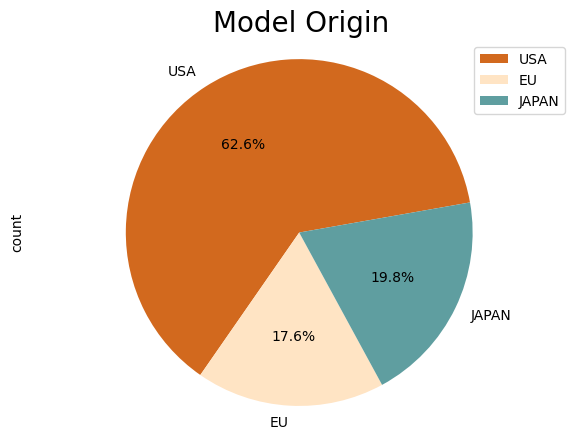

In [41]:
# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

----

# 박스 플롯

* 박스 플롯(boxplot)은 범주형 데이터의 분포를 파악하는데 적합
    - 5개의 통계 지표(최소값, 제1사분위수(25%), 중앙값(중위수), 제3사분위수(75%), 최대값)를 제공
    
* 용어 정리
    - 백분위 수 : 데이터를 백등분 한 것
    - 사분위 수 : 데이터를 4등분 한 것
    - 중위수 : 데이터의 정 가운데 순위에 해당하는 값.(관측치의 절반은 크거나 같고 나머지 절반은 작거나 같다.)
    - 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
    - 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
    - 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)

* 박스 플롯 예제
    - 제조국가별 연비 분포를 보여주는 박스 플롯
    - figure() 함수로 생성하는 그림틀의 크기는 figsize=(15, 5) 옵션 사용하여 가로 15, 세로 5로 설정
    - 그림틀을 2개의 axes 객체로 분할하기 위해 add_subplot() 메소드를 적용. 
        - 각각 ax1, ax2 변수에 저장
    - 각 axes 객체에 박스 플롯을 그리는 boxplot() 메소드를 적용
        - 'origin' 값이 1인 'mpg'열, 'origin' 값이 2인 'mpg'열, 'origin' 값이 3인 'mpg' 열의 데이터 분포를 출력
    - 박스 플롯에 넣을 열 3개를 리스트에 담아서 x 옵션에 할당
    - labels 옵션을 이용하여 각 열을 나타내는 라벨을 정의
    - 화면 오른쪽 ax2 객체에 vert=Fasle 옵션을 사용하여 수평 박스 플롯을 그림

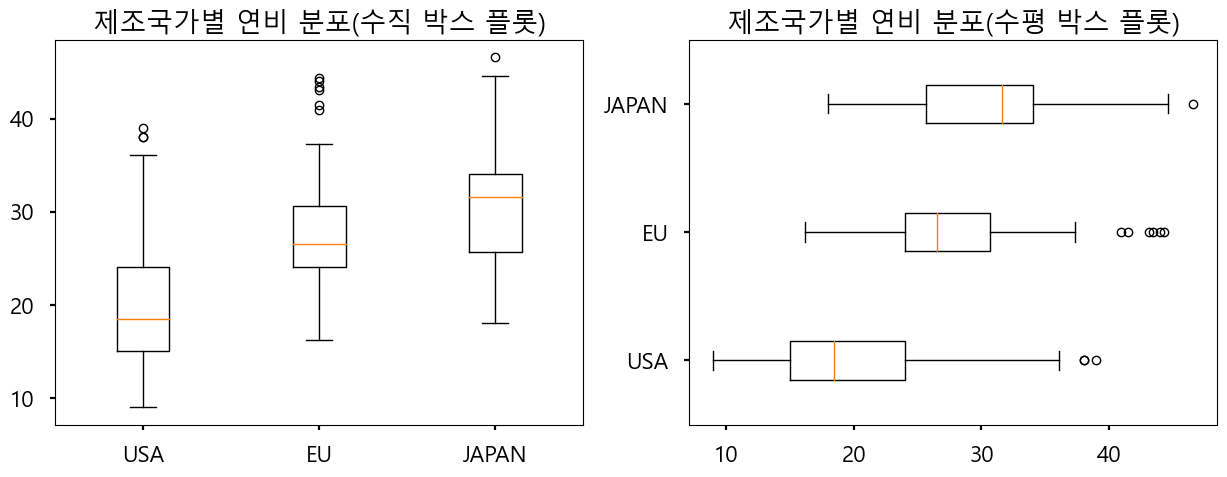

In [42]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\malgun.ttf"   #폰트파일의 위치 지정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('seaborn-poster')            # 스타일 서식 지정
plt.rcParams['axes.unicode_minus']=False   # 마이너스 부호 출력 설정

# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

* 다양한 그래프 참고 사이트 : The Python Graph Gallery
    - 유용한 그래프 샘플과 실행 코드
    - https://python-graph-gallery.com/